In [1]:
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#load csv
file_path = ('/content/houston-aqi-2010-2021.csv')
df = pd.read_csv (file_path)

#printing the csv file will help us to check the column names
print (df.head())

   Unnamed: 0  day_of_year  year   latitude  longitude  avg_pm10  aqi_pm10  \
0           0            2  2010  29.733726 -95.257593        13        12   
1           1            2  2010  29.733726 -95.257593        13        12   
2           2            2  2010  29.733726 -95.257593        13        12   
3           3            2  2010  29.733726 -95.257593        13        12   
4           4            2  2010  29.733726 -95.257593        13        12   

     avg_co  aqi_co    avg_no2  ...    avg_o3  aqi_o3  avg_pm25  aqi_pm25  \
0  0.297667     NaN  17.258333  ...  0.027294      32      11.6        48   
1  0.297667     NaN  17.258333  ...  0.027294      32      11.6        48   
2  0.297667     NaN  17.258333  ...  0.027294      32       9.7        40   
3  0.297667     NaN  17.258333  ...  0.027294      32       9.7        40   
4  0.325000     6.0  17.258333  ...  0.027294      32      11.6        48   

    avg_so2  aqi_so2  avg_humidity  avg_temperature  avg_wind  avg_p

Mean Pressure: 1017.8674999800002
T-statistic for Mean: 1734.6304624185123
P-value for Mean: 1.0110617789105973e-223

Proportion: 1.0
P-value for Proportion: BinomTestResult(k=100, n=100, alternative='two-sided', statistic=1.0, pvalue=1.5777218104420236e-30)

Confidence Interval for Mean (95%): (1016.7043209775483, 1019.0306789824521)


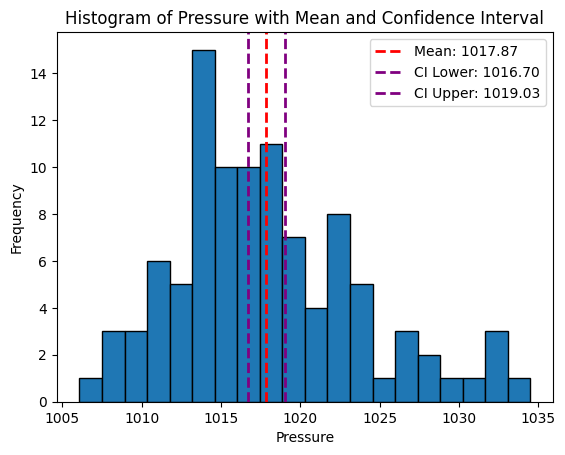

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the data
file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Selecting 100 random samples from "PRESSURE" to perform the given tests
data_random = data.sample(n=100, random_state=42)
selected_samples = data['avg_pressure'].sample(100, random_state=42)

# Setting up values for our hypothesis test
claimed_mean = 1.0
claimed_proportion = 0.5

# Setting up our hypothesis test to get the mean value (one-tailed test)
t_statistic_mean, p_value_mean = stats.ttest_1samp(selected_samples, claimed_mean)

# Calculating the values using 0.05 significance level
num_success = (selected_samples > claimed_mean).sum()
num_trials = len(selected_samples)
proportion = num_success / num_trials

p_value_proportion = stats.binomtest(num_success, n=num_trials, p=claimed_proportion)

# Setting up the confidence interval for the mean
confidence_interval_mean = stats.t.interval(0.95, len(selected_samples) - 1, loc=np.mean(selected_samples), scale=stats.sem(selected_samples))

# Printing of the values
print(f"Mean Pressure: {np.mean(selected_samples)}")
print(f"T-statistic for Mean: {t_statistic_mean}")
print(f"P-value for Mean: {p_value_mean}")
print(f"\nProportion: {proportion}")
print(f"P-value for Proportion: {p_value_proportion}")
print(f"\nConfidence Interval for Mean (95%): {confidence_interval_mean}")

# Plotting a histogram fro better visualization
plt.hist(selected_samples, bins=20, edgecolor='black')
plt.axvline(x=np.mean(selected_samples), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(selected_samples):.2f}')
plt.axvline(x=confidence_interval_mean[0], color='purple', linestyle='dashed', linewidth=2, label=f'CI Lower: {confidence_interval_mean[0]:.2f}')
plt.axvline(x=confidence_interval_mean[1], color='purple', linestyle='dashed', linewidth=2, label=f'CI Upper: {confidence_interval_mean[1]:.2f}')

plt.title('Histogram of Pressure with Mean and Confidence Interval')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Wind vs. Pressure - T-statistic: -1597.3543014600418, P-value: 0.0
Temperature vs. Pressure - T-statistic: -610.1261065910545, P-value: 0.0
Humidity vs. Pressure - T-statistic: -676.3098039381003, P-value: 0.0

Standard Deviation - Wind: 2.3944089983453765
Standard Deviation - Temperature: 14.342013089352871
Standard Deviation - Humidity: 12.70367278715956
Standard Deviation - Pressure: 5.832771933864537

Confidence Intervals:
Wind: (5.166575798070675, 6.121568141929328)
Temperature: (65.60740241478963, 71.32760840521037)
Humidity: (65.17705532915471, 70.24382139084528)
Pressure: (1016.7043209775483, 1019.0306789824521)


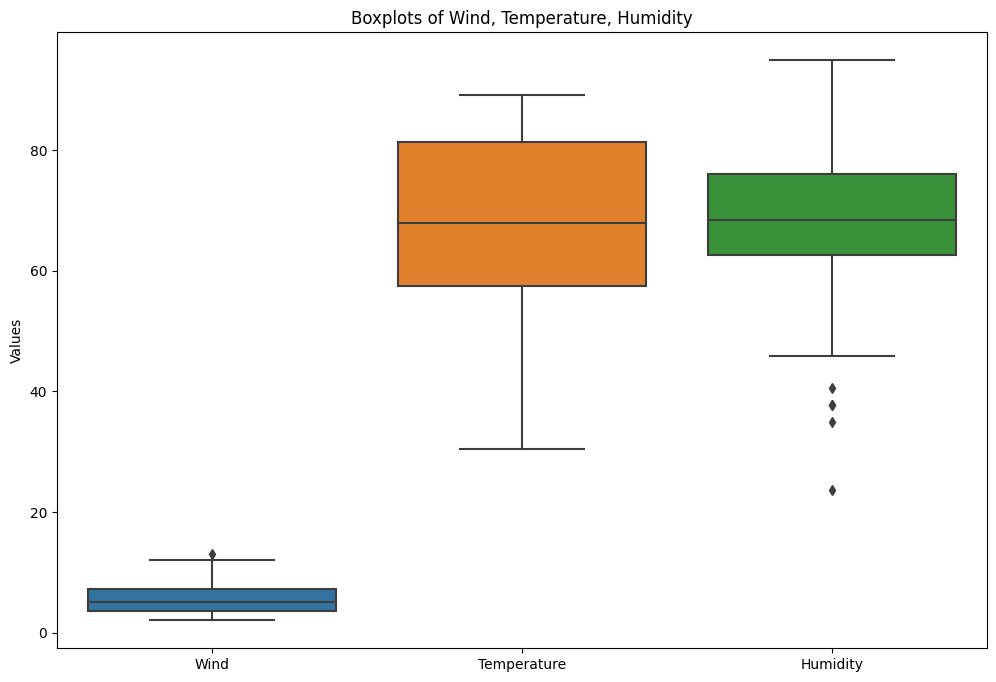

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

file_path = ('/content/houston-aqi-2010-2021.csv')
data = pd.read_csv(file_path)

# Randomly selecting '100' samples from "WIND", "TEMPERATURE", "HUMIDITY"
selected_samples_wind = data['avg_wind'].sample(100, random_state=42)
selected_samples_temperature = data['avg_temperature'].sample(100, random_state=42)
selected_samples_humidity = data['avg_humidity'].sample(100, random_state=42)
selected_samples_pressure = data['avg_pressure'].sample(100, random_state=42)

# Comparison of WIND, TEMPERATURE AND HUMIDITY Mean and Standard deviation with Pressure
t_statistic_wind_pressure, p_value_wind_pressure = stats.ttest_ind(selected_samples_wind, selected_samples_pressure)
t_statistic_temperature_pressure, p_value_temperature_pressure = stats.ttest_ind(selected_samples_temperature, selected_samples_pressure)
t_statistic_humidity_pressure, p_value_humidity_pressure = stats.ttest_ind(selected_samples_humidity, selected_samples_pressure)

# Calculation of the given values
std_dev_wind = np.std(selected_samples_wind)
std_dev_temperature = np.std(selected_samples_temperature)
std_dev_humidity = np.std(selected_samples_humidity)
std_dev_pressure = np.std(selected_samples_pressure)

# Setting up the confidence interval for each of the values
confidence_interval_wind = stats.t.interval(0.95, len(selected_samples_wind) - 1, loc=np.mean(selected_samples_wind), scale=stats.sem(selected_samples_wind))
confidence_interval_temperature = stats.t.interval(0.95, len(selected_samples_temperature) - 1, loc=np.mean(selected_samples_temperature), scale=stats.sem(selected_samples_temperature))
confidence_interval_humidity = stats.t.interval(0.95, len(selected_samples_humidity) - 1, loc=np.mean(selected_samples_humidity), scale=stats.sem(selected_samples_humidity))
confidence_interval_pressure = stats.t.interval(0.95, len(selected_samples_pressure) - 1, loc=np.mean(selected_samples_pressure), scale=stats.sem(selected_samples_pressure))

# Printing the results
print(f"Wind vs. Pressure - T-statistic: {t_statistic_wind_pressure}, P-value: {p_value_wind_pressure}")
print(f"Temperature vs. Pressure - T-statistic: {t_statistic_temperature_pressure}, P-value: {p_value_temperature_pressure}")
print(f"Humidity vs. Pressure - T-statistic: {t_statistic_humidity_pressure}, P-value: {p_value_humidity_pressure}")
print(f"\nStandard Deviation - Wind: {std_dev_wind}")
print(f"Standard Deviation - Temperature: {std_dev_temperature}")
print(f"Standard Deviation - Humidity: {std_dev_humidity}")
print(f"Standard Deviation - Pressure: {std_dev_pressure}")
print("\nConfidence Intervals:")
print(f"Wind: {confidence_interval_wind}")
print(f"Temperature: {confidence_interval_temperature}")
print(f"Humidity: {confidence_interval_humidity}")
print(f"Pressure: {confidence_interval_pressure}")

df_selected_samples = pd.DataFrame({
    'Wind': selected_samples_wind,
    'Temperature': selected_samples_temperature,
    'Humidity': selected_samples_humidity
})

# Plotting boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected_samples)
plt.title('Boxplots of Wind, Temperature, Humidity')
plt.ylabel('Values')
plt.show()


# ANALYSIS



1. An average pressure value of around 1017.87 was obtained by selecting 100 data points at random from the pressure column given in our dataset. It was discovered that the t-statistic, which measures the sample mean's departure in standard deviations from the assumed mean (1.0) was abnormally high (1734.63). Additionally, the p-value—which indicates the likelihood of generating a t-statistic that is as severe or more extreme than the observed one—turned out to be very tiny (1.0110617789105973e-223), assuming that the null hypothesis—that is, that the population mean equals 1.0—to be true. The null hypothesis is rejected because the p-value is much smaller than the generally accepted significance level of 0.05.


2. ## Comparison of Pressure, Temperature, Humidity, and Wind

- ### **Pressure against Wind**

  A significant negative figure, around -1597.35, is the t-statistic for wind versus pressure. This implies that the average pressure is far higher than the average wind speed. The null hypothesis, according to which there is no difference between average wind speed and average pressure, is strongly refuted by the comparison's incredibly small p-value (which is very near to zero).

- ### **Pressure against Temperature**

  Another significant negative value is the t-statistic for Temperature vs Pressure, which is around -610.13. It appears from this that the average temperature is much lower than the average pressure. Since there is enough evidence to refute the null hypothesis—which holds that there is no difference between average temperature and average pressure—the p-value for this comparison is quite near to zero.

- ### **Pressure against Humidity**

  Humidity vs Pressure has a t-statistic of around -676.31, which is another extremely negative value. This implies a large difference between average humidity and average pressure. The null hypothesis, which claims that there is no difference between the average

## Standard Deviations

As the **average wind speed** varies by around *2.39 units* around the mean, the standard deviation for **'avg_wind'** is approximately *2.39*. Since the **average temperature** for **'avg_temperature'** has a standard deviation of around *14.34*, it deviates from the mean by roughly *14.34* units. Since the **average humidity** varies by around *12.70* units around the mean, the standard deviation for **'avg_humidity'** is approximately *12.70*. **'avg_pressure'** has a standard deviation of around *5.83*, which indicates that the **average pressure** deviates from the mean by roughly *5.83 units*.

## Confidence Intervals

- The **wind speed's** 95% confidence interval is between *5.17 and 6.12*. This indicates a 95% confidence interval around the real mean wind speed.

- **Temperature** has a 95% confidence interval that ranges from *65.61 to 71.33*. Likewise, we have a 95% confidence level that the genuine mean temperature falls within this range.

- The range of *65.18 to 70.24* is the **humidity's** 95% confidence interval. The real mean humidity is within this range with a 95% confidence interval.

- **Pressure's** 95% confidence interval is between *1016.70 and 1019.03*. We know, with 95% certainty, that this interval contains the correct mean pressure.



